# Assignment 3, Question 1, ISCO630E 
### Submitted by Bhanu Bhandari (IEC2016027)
#### Logistic Regression to predict the Admission or Rejection of a student into a program based on marks in two tests


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The data was in a docx file so it was first converted into a csv file in order to extract it via pandas. Before looking at which kind of hypothesis we can use to separate the data and obtain a decision boundary, we first explore and visualise the data we have at hand. 

In [61]:
input_data = pd.read_csv("/Users/bhanubhandari/Desktop/GCN_3/data_admission.csv")

In [62]:
input_data

,parameter1,parameter2,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [63]:
X = input_data[["parameter1","parameter2"]]

In [64]:
X = X.values

In [65]:
X

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644],
       [45.08327748, 56.31637178],
       [61.10666454, 96.51142588],
       [75.02474557, 46.55401354],
       [76.0987867 , 87.42056972],
       [84.43281996, 43.53339331],
       [95.86155507, 38.22527806],
       [75.01365839, 30.60326323],
       [82.30705337, 76.4819633 ],
       [69.36458876, 97.71869196],
       [39.53833914, 76.03681085],
       [53.97105215, 89.20735014],
       [69.07014406, 52.74046973],
       [67.94685548, 46.67857411],
       [70.66150955, 92.92713789],
       [76.97878373, 47.57596365],
       [67.37202755, 42.83843832],
       [89.67677575, 65.79936593],
       [50.53478829, 48.85581153],
       [34.21206098, 44.2095286 ],
       [77.92409145, 68.97235999],
       [62.27101367, 69.95445795],
       [80.19018075, 44.82162893],
       [93.1143888 , 38.80067034],
       [61.83020602,

In [66]:
Y = (input_data["result"]).values

In [67]:
Y

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

For clarity of the data and the next steps for our predictions, we now visualise the data at hand.

(100, 2) (100,)


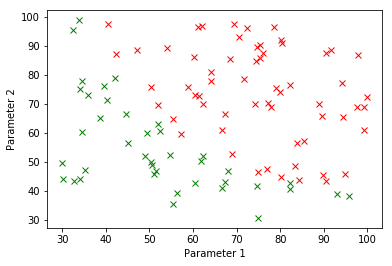

In [68]:
print(X.shape, Y.shape)
for i in range(X.shape[0]):
    if Y[i]==1:
        plt.plot(X[i,0],X[i,1],'rx')
    else:
        plt.plot(X[i,0],X[i,1],'gx')
plt.xlabel('Parameter 1')
plt.ylabel('Parameter 2')
plt.show()

Here, we can see that the boundary between selection and rejection is fairly linear in nature, that is we can use a linear hypothesis to predict the values. 

Hence, we go forward with the hypothesis 
$$ y = w_0 + w_1x_1 + w_2x_2 $$

In [69]:
random_val_msk = np.random.rand(len(X)) < 0.7
X_train = X[random_val_msk]
X_test = X[~random_val_msk]
Y_train = Y[random_val_msk]
Y_test = Y[~random_val_msk] 
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(68, 2) (32, 2) (68,) (32,)


Now that we have the train-test split, we shall proceed to train the data with and without normalisation in order to see the results of both. 

In [70]:
# Adding row for bias term w0 in the hypothesis to the entire dataset 
X_train = np.concatenate( (np.ones((X_train.shape[0],1)),X_train) , axis=1)
X_test = np.concatenate( (np.ones((X_test.shape[0],1)),X_test) , axis=1)
print(X_train.shape)

(68, 3)


In [71]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [72]:
m,n = X_train.shape # n is the shape of original_X.shape[0]+1
weights = np.random.rand(1,n)
print(weights)
h = sigmoid(X_train@weights.T)
h = h.reshape(-1)
print(h.shape)

[[0.98919317 0.11733969 0.39062603]]
(68,)


In [49]:
def gradient_descent(X,Y,theta,alpha,lambda1,iterations):
    i=0
    while(i<iterations):
        sigmoid_output = sigmoid(X@theta.T).reshape(-1)
        theta = theta - (alpha/m)*(X.T@(sigmoid_output-Y)) - (lambda1/m)*np.sum(theta[:,1:])
        i+=1
    return theta

In [34]:
alphas = [0.0001, 0.0005, 0.0010, 0.050, 0.0100, 0.100, 0.150] 
epochs = 100000

for alpha in alphas:
    theta_x = gradient_descent(X_train,Y_train,weights,alpha,0,epochs) 
    h = sigmoid(X_test@theta_x.T)
    h = ((h>=0.5)*1).reshape(-1)
    accuracy = (np.sum(h==Y_test)/Y_test.shape[0])*100
    print("Learning rate value = " + str(alpha) + ", Accuracy % = " + str(accuracy))

Learning rate value = 0.0001, Accuracy % = 54.83870967741935
Learning rate value = 0.0005, Accuracy % = 70.96774193548387
Learning rate value = 0.001, Accuracy % = 80.64516129032258
Learning rate value = 0.05, Accuracy % = 83.87096774193549
Learning rate value = 0.01, Accuracy % = 83.87096774193549
Learning rate value = 0.1, Accuracy % = 83.87096774193549
Learning rate value = 0.15, Accuracy % = 83.87096774193549


In [51]:
alphas = [0.0001, 0.0005, 0.0010, 0.050, 0.0100, 0.100, 0.150] 
lambdas = [0,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,20]
epochs = 100000

for lambda1 in lambdas:
    print("Lambda = " + str(lambda1))
    for alpha in alphas:
        theta_x = gradient_descent(X_train,Y_train,weights,alpha,lambda1,epochs)
        hypothesis = sigmoid(X_test@theta_x.T)
        hypothesis = (hypothesis>=0.5)*1
        hypothesis = hypothesis.reshape(-1)
        truth = hypothesis==Y_test
        acc = (np.sum(truth)/Y_test.shape[0])*100
        print("Learning rate value: " + str(alpha) + ", Accuracy % = " + str(acc))
    print("End of iteration \n")

Lambda = 0
Learning rate value: 0.0001, Accuracy % = 50.0
Learning rate value: 0.0005, Accuracy % = 59.375
Learning rate value: 0.001, Accuracy % = 75.0
Learning rate value: 0.05, Accuracy % = 81.25
Learning rate value: 0.01, Accuracy % = 59.375
Learning rate value: 0.1, Accuracy % = 84.375
Learning rate value: 0.15, Accuracy % = 81.25
End of iteration 

Lambda = 0.001
Learning rate value: 0.0001, Accuracy % = 50.0
Learning rate value: 0.0005, Accuracy % = 59.375
Learning rate value: 0.001, Accuracy % = 75.0
Learning rate value: 0.05, Accuracy % = 84.375
Learning rate value: 0.01, Accuracy % = 87.5
Learning rate value: 0.1, Accuracy % = 87.5
Learning rate value: 0.15, Accuracy % = 78.125
End of iteration 

Lambda = 0.005
Learning rate value: 0.0001, Accuracy % = 50.0
Learning rate value: 0.0005, Accuracy % = 59.375
Learning rate value: 0.001, Accuracy % = 75.0
Learning rate value: 0.05, Accuracy % = 78.125
Learning rate value: 0.01, Accuracy % = 81.25
Learning rate value: 0.1, Accuracy

Hence, we can observe that without normalisation as well, the linear hypothesis for logistic regression performs very well, with a best accuracy of around 87.5%. However, normalisation with or without regularisation can indeed help improve our accuracy by putting the values close together in a range between 0 and 1. 

Now, we perform gradient descent with normalisation and observe the differences. 

## GRADIENT DESCENT WITH NORMALISED VALUES

In [73]:
X = input_data[["parameter1","parameter2"]].values
random_val_msk = np.random.rand(len(X)) < 0.7
X_train = X[random_val_msk]
X_test = X[~random_val_msk]
Y_train = Y[random_val_msk]
Y_test = Y[~random_val_msk]
X_train = (X_train-np.min(X_train,axis=0))/(np.max(X_train,axis=0)-np.min(X_train,axis=0))
X_test = (X_test-np.min(X_test,axis=0))/(np.max(X_test,axis=0)-np.min(X_test,axis=0))
print(X_train, X_test)

[[0.00326632 0.19470455]
 [0.08296784 0.61961779]
 [0.43176427 0.81600135]
 [0.7019434  0.65539214]
 [0.2153456  0.37665959]
 [0.44500891 0.96545859]
 [0.64449684 0.23365526]
 [0.65989108 0.83229079]
 [0.77934283 0.18940757]
 [0.94315096 0.11165142]
 [0.64433793 0.        ]
 [0.74887421 0.67205614]
 [0.56336978 0.98314328]
 [0.34273413 0.85846452]
 [0.55914951 0.32427783]
 [0.5430494  0.23547989]
 [0.67250409 0.24862534]
 [0.53481039 0.17922749]
 [0.29348214 0.26737325]
 [0.05952839 0.19931197]
 [0.68605319 0.56205138]
 [0.71853306 0.20827835]
 [0.45537943 0.28788555]
 [0.12508388 0.50379883]
 [0.44891644 0.61823627]
 [0.7932702  0.38743524]
 [0.3160307  0.47643451]
 [0.05527778 1.        ]
 [0.64112153 0.16069675]
 [0.05912103 0.65382979]
 [0.77174023 0.37653763]
 [0.3080005  0.23808317]
 [0.74975856 0.14670505]
 [0.30083445 0.2229426 ]
 [0.4610047  0.31432447]
 [0.67557495 0.58381678]
 [0.97052763 0.82214305]
 [0.88156804 0.85097827]
 [0.71501627 0.63808845]
 [0.99204044 0.44525373]


We then add a bias term to the hypothesis we assumed earlier, as we did previously in order to satisfy the matrix dimensions for calculating the gradient descent. 

In [77]:
# Adding row for bias term w0 in the hypothesis to the entire dataset 
X_train = np.concatenate( (np.ones((X_train.shape[0],1)),X_train) , axis=1)
X_test = np.concatenate( (np.ones((X_test.shape[0],1)),X_test) , axis=1)
m,n = X_train.shape # n is the shape of original_X.shape[0]+1
weights = np.random.rand(1,n)
print(weights)
h = sigmoid(X_train@weights.T)
h = h.reshape(-1)
print(h.shape)

[[0.05971716 0.61983187 0.9697338 ]]
(73,)


We now run the gradient descent algorithm after assuming certain random values of the weights to start the analysis, and then we keep on improving on those values by using gradient descent. Firstly, we run the gradient descent algorithm using just the normalised data with variable learning rates. We later on run the same analysis with varied values of the regulariser **lambda**. 

## WITHOUT REGULARISATION

In [79]:
alphas = [0.0001, 0.0005, 0.0010, 0.050, 0.0100, 0.100, 0.150] 
epochs = 100000

for alpha in alphas:
    theta_x = gradient_descent(X_train,Y_train,weights,alpha,0,epochs) 
    hypothesis = sigmoid(X_test@theta_x.T)
    hypothesis = ((hypothesis>=0.5)*1).reshape(-1)
    accuracy = (np.sum(hypothesis==Y_test)/Y_test.shape[0])*100
    print("Learning rate value = " + str(alpha) + ", Accuracy % = " + str(accuracy))

Learning rate value = 0.0001, Accuracy % = 77.77777777777779
Learning rate value = 0.0005, Accuracy % = 92.5925925925926
Learning rate value = 0.001, Accuracy % = 85.18518518518519
Learning rate value = 0.05, Accuracy % = 85.18518518518519
Learning rate value = 0.01, Accuracy % = 85.18518518518519
Learning rate value = 0.1, Accuracy % = 85.18518518518519
Learning rate value = 0.15, Accuracy % = 85.18518518518519


## WITH REGULARISATION

In [81]:
alphas = [0.0001, 0.0005, 0.0010, 0.050, 0.0100, 0.100, 0.150] 
lambdas = [0,0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,20]
epochs = 100000

for lambda1 in lambdas:
    print("Lambda = " + str(lambda1))
    for alpha in alphas:
        theta_x = gradient_descent(X_train,Y_train,weights,alpha,lambda1,epochs)
        hypothesis = sigmoid(X_test@theta_x.T)
        hypothesis = (hypothesis>=0.5)*1
        hypothesis = hypothesis.reshape(-1)
        truth = hypothesis==Y_test
        acc = (np.sum(truth)/Y_test.shape[0])*100
        print("Learning rate value: " + str(alpha) + ", Accuracy % = " + str(acc))
    print("End of iteration \n")

Lambda = 0
Learning rate value: 0.0001, Accuracy % = 77.77777777777779
Learning rate value: 0.0005, Accuracy % = 92.5925925925926
Learning rate value: 0.001, Accuracy % = 85.18518518518519
Learning rate value: 0.05, Accuracy % = 85.18518518518519
Learning rate value: 0.01, Accuracy % = 85.18518518518519
Learning rate value: 0.1, Accuracy % = 85.18518518518519
Learning rate value: 0.15, Accuracy % = 85.18518518518519
End of iteration 

Lambda = 0.001
Learning rate value: 0.0001, Accuracy % = 66.66666666666666
Learning rate value: 0.0005, Accuracy % = 88.88888888888889
Learning rate value: 0.001, Accuracy % = 88.88888888888889
Learning rate value: 0.05, Accuracy % = 85.18518518518519
Learning rate value: 0.01, Accuracy % = 85.18518518518519
Learning rate value: 0.1, Accuracy % = 85.18518518518519
Learning rate value: 0.15, Accuracy % = 85.18518518518519
End of iteration 

Lambda = 0.005
Learning rate value: 0.0001, Accuracy % = 33.33333333333333
Learning rate value: 0.0005, Accuracy % = 

## CONCLUSION

Thus, after observing the process of gradient descent with or without regularisation, we obtain an accuracy of a maximum of 92% using normalisation. but adding a regularising term does not alter the prediction accuracy in any meaningful way. This accuracy is around 5% better than gradient descent without normalisation but with regularisation, which was 87%. Hence, we establish that we get a better accuracy with normalisation. The decision boundary is extremely close to the actual boundary between the passed and failed students in this particular case. 